# Introduction

The purpose of this project is to investigate King County real estate data and make recommendations for house flippers in the area. We will accomplish this by creating a linear regression model to isolate the most important variables that affect sale price

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

%matplotlib inline

#prevent notebook to hide columns
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Cleaning Data

The first step of the process is to examine our data and make sure that it is all present and in the correct format. Additionally we will remove categories that will not be important for our model.

In [4]:
# We can assume if there no renovation or waterfront data is listed, they are not included for that listing.

df['yr_renovated'].fillna(value=0.0, inplace=True)
df['waterfront'].fillna(value=0.0, inplace=True)

There are 63 houses missing 'view' values. We will update view based on the mean score of view for houses with and without waterfronts.

In [5]:
print('Mean view with waterfront: ' + str(round(df[df['waterfront']==1]['view'].mean())))
print('Mean view without waterfront: ' + str(round(df[df['waterfront']==0]['view'].mean())))

Mean view with waterfront: 4.0
Mean view without waterfront: 0.0


In [6]:
view_missing = df[df['view'].isna()].sort_values('price', ascending=False)
view_missing[view_missing['waterfront'] ==1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1313,7558700030,4/13/2015,5300000.0,6,6.0,7390,24829,2.0,1.0,NaN,4,12,5000,2390.0,1991,0.0,98040,47.5631,-122.21,4320,24619


In [7]:
df.loc[df['id'] == 7558700030, 'view'] = 4.0
df['view'].fillna(value=0.0, inplace=True)

Finally, we want to investigate square feet of basement since we expect it to be a numerical value rather than an object. We will also change price to an int, since prices are in whole numbers which would not require decimals.

In [8]:
df['sqft_basement'].value_counts().index

Index(['0.0', '?', '600.0', '500.0', '700.0', '800.0', '400.0', '1000.0',
       '900.0', '300.0',
       ...
       '2300.0', '274.0', '1024.0', '1798.0', '3480.0', '518.0', '1960.0',
       '652.0', '1245.0', '2360.0'],
      dtype='object', length=304)

In [9]:
df['sqft_basement'].replace('?', '0.0',inplace=True)

In [10]:
df['sqft_basement'] = df['sqft_basement'].apply(lambda x: int(x[:-2]))

In [11]:
df.price = df.price.astype('int')

In [12]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Creating New Variables

Since we're looking into this information for house flipping, we want to make sure that renovating houses will have a positive impact on the price of homes. We are also interested to find out if the age of the house impacts the price of the home.

In [14]:
# Exact date is not necessary, only the year

df['year_sold'] = pd.DatetimeIndex(df['date']).year
df.drop('date', axis=1, inplace=True)

In [15]:
# Determine how old the house is
df['house_age'] = df['year_sold'] - df['yr_built']
# Treat renovation as a binary variable
df['reno'] = np.where(df['yr_renovated'] != 0, 1, 0)
# Remove redundant columns
df = df.drop(['yr_built', 'yr_renovated'], axis=1)

In [16]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno
0,7129300520,221900,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,2014,59,0
1,6414100192,538000,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,2014,63,1
2,5631500400,180000,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,98028,47.7379,-122.233,2720,8062,2015,82,0
3,2487200875,604000,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,2014,49,0
4,1954400510,510000,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,2015,28,0


# Potential Outliers

Now that we have clean data and all of the information we want, we are going to look for any outliers.

To start with, from King County's website, we can see that anything above a grade 10 is a custom house or a mansion, which does not fit into the scope of this examination.

Source: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

In [17]:
df = df[df['grade'] <= 10]

Next we'll take a look at histograms of our variables and see if we can find any outliers.

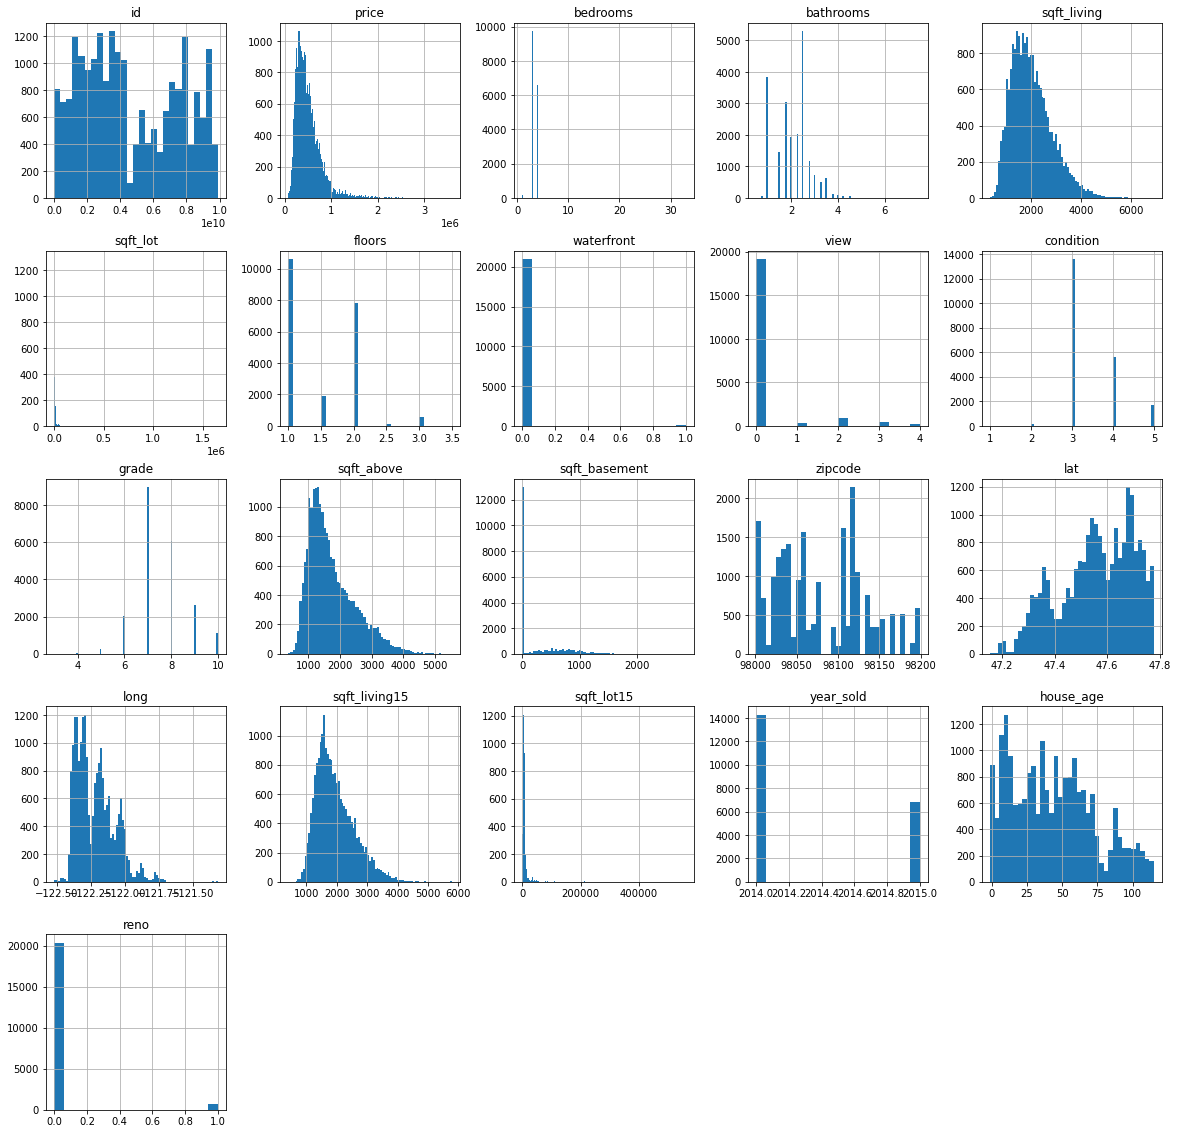

In [18]:
df.hist(figsize=(20,20), bins='auto');

From the graph we looked for data points that have extreme outliers. Typically we're going to find this if a histogram for a particular data point is skewed left or right. From looking at our group of histograms, we can see that there may be some outliers in the following variables:

* Price
* Bedrooms
* Bathrooms
* Square Footage of Lot, Basement, and Neighboring Lots



/Users/georgeferre/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


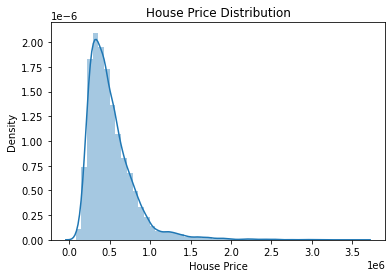

In [19]:
fig, ax = plt.subplots()
ax = sns.distplot(df['price'])

ax.set_title("House Price Distribution")
ax.set_xlabel('House Price');

Taking a closer look at the histogram of price, we do see that after around 1 million dollars, the price trails a bit. However, as our dependent variable, we do not want to arbitrarily pick a cutoff point. Even if it's not necesarily realistic for our house flippers to to buy in at 2 million, there may be valuable insights into what leads the most expensive houses to be so expensive.

We do, however, want to try and eliminate outliers elsewhere. For the rest of our variables identified, we are going to remove houses that we think may be unrealistic to investigate for house flipping.

In [20]:
df.bedrooms.value_counts()

3     9758
4     6591
2     2755
5     1488
6      253
1      196
7       33
8       12
9        5
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [21]:
df[df.bedrooms >= 10]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno
8748,1773100755,520000,11,3.00,3000,4960,2.0,0.0,0.0,3,7,2400,600,98106,47.5560,-122.363,1420,4960,2014,96,1
13301,627300145,1150000,10,5.25,4590,10920,1.0,0.0,2.0,3,9,2500,2090,98004,47.5861,-122.113,2730,10400,2014,6,0
15147,5566100170,650000,10,2.00,3610,11914,2.0,0.0,0.0,4,7,3010,600,98006,47.5705,-122.175,2040,11914,2014,56,0
15856,2402100895,640000,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580,98103,47.6878,-122.331,1330,4700,2014,67,0
19239,8812401450,660000,10,3.00,2920,3745,2.0,0.0,0.0,4,7,1860,1060,98105,47.6635,-122.320,1810,3745,2014,101,0


In [22]:
df = df[df.bedrooms < 10]

In [23]:
df.bathrooms.value_counts()

2.50    5301
1.00    3851
1.75    3045
2.25    2041
2.00    1929
1.50    1444
2.75    1167
3.00     731
3.50     627
3.25     514
3.75     121
4.00      95
0.75      71
4.50      67
4.25      48
5.00      10
4.75       9
1.25       8
0.50       4
5.25       4
7.50       1
5.50       1
6.00       1
5.75       1
Name: bathrooms, dtype: int64

In [24]:
df[df.bathrooms > 6]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno
8537,424049043,450000,9,7.5,4050,6504,2.0,0.0,0.0,3,7,4050,0,98144,47.5923,-122.301,1448,3866,2014,18,0


In [25]:
df = df[df.bathrooms <= 6]

In [26]:
df.shape

(21090, 21)

In [27]:
df.sqft_lot.value_counts()

5000     355
6000     284
4000     251
7200     218
4800     119
        ... 
15040      1
10946      1
8899       1
6852       1
36862      1
Name: sqft_lot, Length: 9469, dtype: int64

In [28]:
df[df.sqft_lot > 700000]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno
1717,1020069017,700000,4,1.00,1300,1651359,1.0,0.0,3.0,4,6,1300,0,98022,47.2313,-122.023,2560,425581,2015,95,0
3945,722069232,998000,4,3.25,3770,982998,2.0,0.0,0.0,3,10,3770,0,98058,47.4140,-122.087,2290,37141,2014,22,0
4437,3626079040,790000,2,3.00,2560,982278,1.0,0.0,0.0,3,8,2560,0,98014,47.6955,-121.861,1620,40946,2014,10,0
4536,2522029039,550000,3,2.00,3650,843309,2.0,0.0,0.0,4,7,3650,0,98070,47.3627,-122.496,1870,273992,2014,23,0
7640,2623069031,542500,5,3.25,3010,1074218,1.5,0.0,0.0,5,8,2010,1000,98027,47.4564,-122.004,2450,68825,2014,83,0
7762,2323089009,855000,4,3.50,4030,1024068,2.0,0.0,0.0,3,10,4030,0,98045,47.4619,-121.744,1830,11700,2015,9,0
12993,619079096,750000,3,2.50,2350,715690,1.5,0.0,0.0,4,9,2350,0,98022,47.1622,-121.971,1280,325393,2015,36,0
17305,3326079016,190000,2,1.00,710,1164794,1.0,0.0,0.0,2,5,710,0,98014,47.6888,-121.909,1680,16730,2015,100,0


In [29]:
df = df[df.sqft_lot <= 700000]

In [30]:
df[df.sqft_basement > 3000]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno


In [31]:
df[df.sqft_lot15 > 400000]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno
3797,1550000463,637000,4,3.50,3080,118918,2.0,0.0,0.0,3,9,3080,0,98019,47.7721,-121.924,1830,434728,2014,6,0
8655,3226079059,549950,3,1.75,2930,266587,2.0,0.0,0.0,3,8,2440,0,98014,47.6991,-121.947,2700,438213,2014,19,0
13451,3420069060,790000,3,2.50,2640,432036,1.5,0.0,3.0,3,10,2640,0,98022,47.1795,-122.036,1500,560617,2014,18,0
19141,1020069042,858000,4,3.50,4370,422967,1.0,0.0,2.0,4,10,2580,1790,98022,47.2332,-122.029,3260,422967,2014,36,0


In [32]:
df = df[df.sqft_lot15 <= 400000]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21078 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21078 non-null  int64  
 1   price          21078 non-null  int64  
 2   bedrooms       21078 non-null  int64  
 3   bathrooms      21078 non-null  float64
 4   sqft_living    21078 non-null  int64  
 5   sqft_lot       21078 non-null  int64  
 6   floors         21078 non-null  float64
 7   waterfront     21078 non-null  float64
 8   view           21078 non-null  float64
 9   condition      21078 non-null  int64  
 10  grade          21078 non-null  int64  
 11  sqft_above     21078 non-null  int64  
 12  sqft_basement  21078 non-null  int64  
 13  zipcode        21078 non-null  int64  
 14  lat            21078 non-null  float64
 15  long           21078 non-null  float64
 16  sqft_living15  21078 non-null  int64  
 17  sqft_lot15     21078 non-null  int64  
 18  year_s

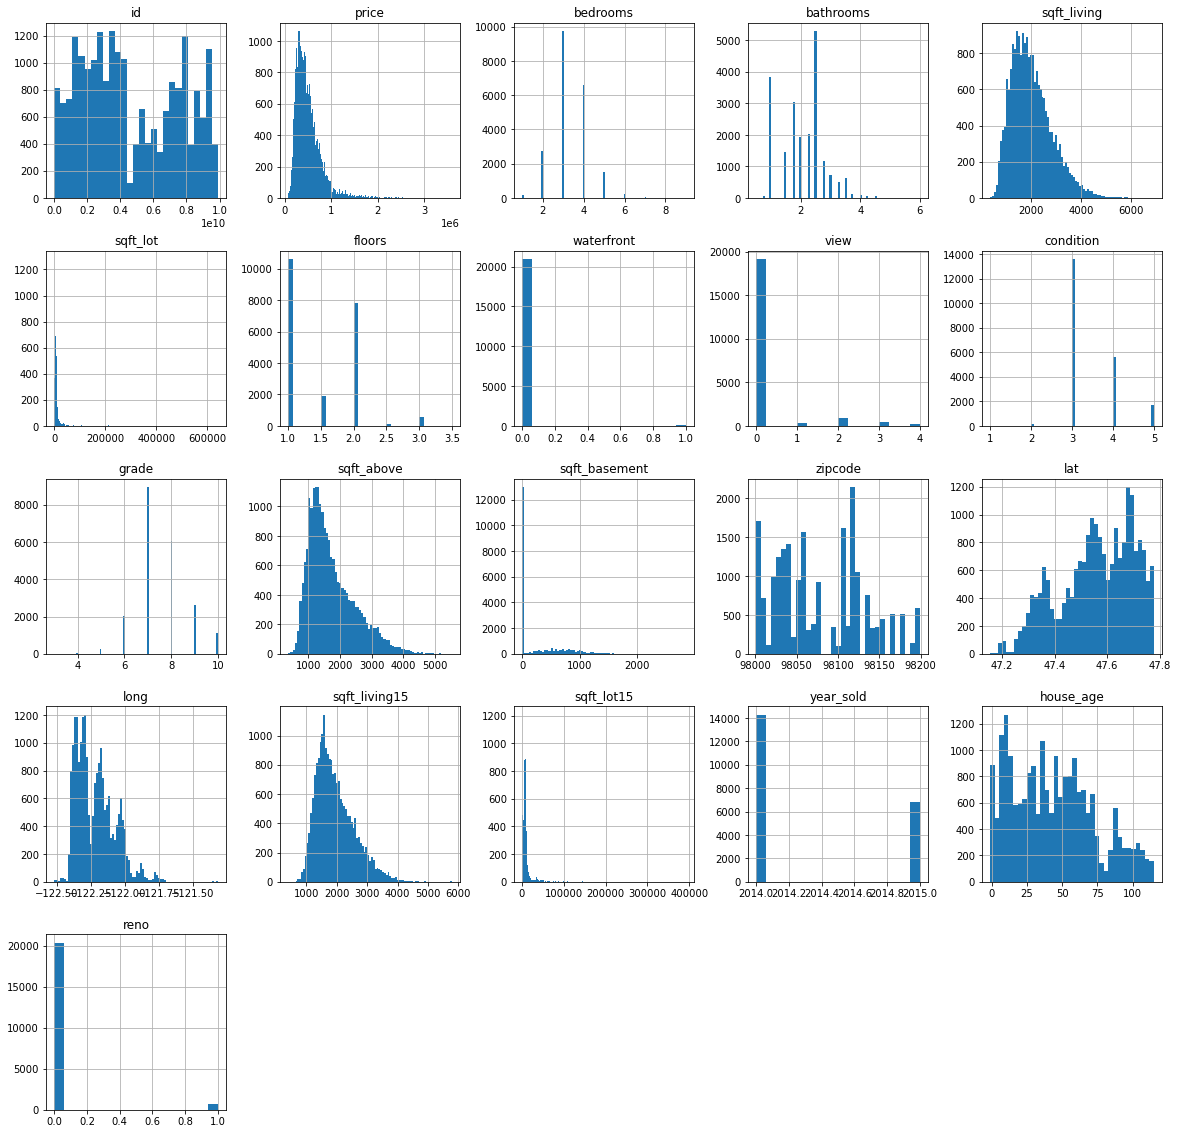

In [34]:
df.hist(figsize=(20,20), bins='auto');

After re-examination, we think our data looks better in terms of avoiding outliers.

# Building Our Model

We are going to start my building a simple model that will find the variable most correlated with price, and then see how well that variable can predict price. From there, we are going to find all of the relevant variables related to price, and add them to or model.

To test our model, we are going to split our data. Part of our data will be used to test the linear regression formula we have created.

In [35]:
y = df['price']
X = df.drop('price', axis=1)

In [36]:
from sklearn.model_selection import train_test_split

# Split data into data to train model, and to test model
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

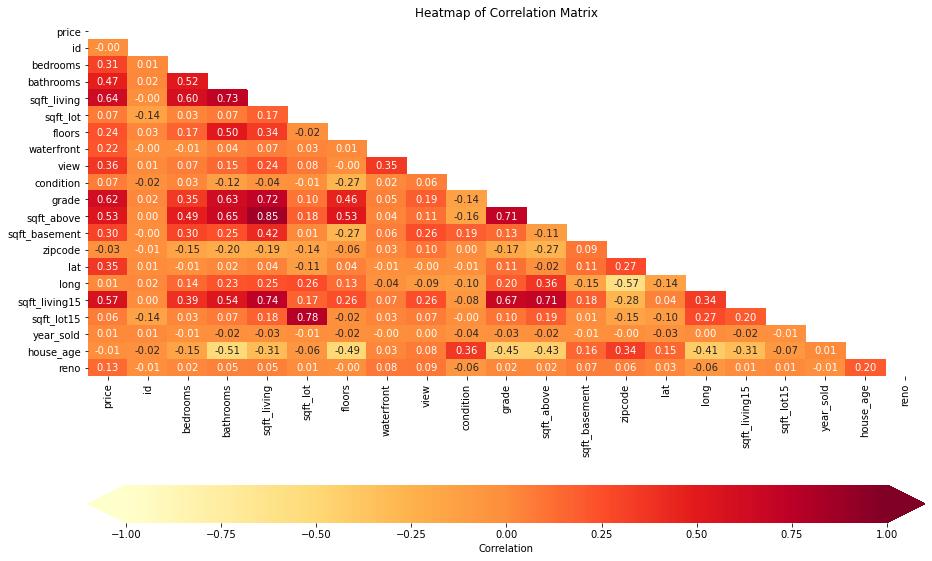

In [37]:
# Creating a heatmap that will help us see what variables are correlated

hm_df = pd.concat([y_train, X_train], axis=1)
corr = hm_df.corr()

fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype=bool)),
            ax=ax, cmap='YlOrRd', annot=True, center=0, fmt=".2f", vmin=-1, vmax=1, 
            cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"})

ax.set_title("Heatmap of Correlation Matrix");

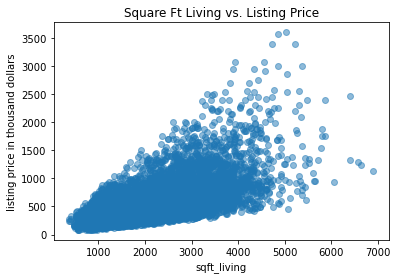

In [38]:
# sqft_living has the highest correlation to price
highest_corr = 'sqft_living'

# Graph will show price based only on sqft_living
fig, ax = plt.subplots()

ax.scatter(X_train[highest_corr], y_train/1000, alpha=0.5)
ax.set_xlabel(highest_corr)
ax.set_ylabel("listing price in thousand dollars")
ax.set_title("Square Ft Living vs. Listing Price");

This is a good start to our model. We can see that there is a clear relationship between sqft_living and price. However, the cone shape indicates that this simple model will have some pretty high variance. Let's test it out:

In [39]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

In [40]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[highest_corr]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.41820323661200914
Validation score: 0.4010782880899049


While it is good that our test score and validation scores are similar, a score of .42 leaves a lot to be desired.

# Building a Model with Top 4 Correlations

Next we are going to take the top 4 correlated varaiables rather than only the top rated.

In [41]:
X_train_second_model = X_train[['sqft_living' , 'grade', 'sqft_living15', 'sqft_above']]
X_train_second_model

,sqft_living,grade,sqft_living15,sqft_above
4755,3180,10,3180,3180
5932,1850,8,2080,1850
14705,1440,5,1440,1440
8238,1000,7,1000,1000
5032,1730,7,1800,1260
...,...,...,...,...
4482,4580,10,2710,4580
12104,1890,7,1690,1890
15087,2370,9,2510,2370
10048,2010,8,1850,1310


In [42]:
second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.4876078287069508
Validation score: 0.47452283811942103

Baseline Model
Train score:      0.41820323661200914
Validation score: 0.4010782880899049


As we can see, adding more variables into the model has improved the score. 

# Building a Model with All Numeric Features

Since we had some success with adding in more variables, we can start adding in all of the variables that we have. We will start by adding relevant numeric features, since categorical features need to be treated a bit differently.

Note: Waterfront and Reno are technically categorical, but can be treated numerically since they are binary.

In [43]:
# Zipcode is categorical
# ID, latitude, and longitude are not relevant
# Year sold does not differentiate data enough to keep
X_train_numeric = X_train.drop(['id', 'zipcode', 'year_sold', 'lat', 'long'],axis=1)
X_train_numeric 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age,reno
4755,5,2.50,3180,13806,2.0,0.0,0.0,4,10,3180,0,3180,13798,24,0
5932,4,2.50,1850,9248,2.0,0.0,0.0,3,8,1850,0,2080,8711,18,0
14705,4,2.00,1440,9477,1.0,0.0,0.0,3,5,1440,0,1440,9546,71,0
8238,3,1.00,1000,6947,1.0,0.0,0.0,4,7,1000,0,1000,6947,67,0
5032,3,1.75,1730,7807,1.0,0.0,0.0,3,7,1260,470,1800,7650,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4482,5,4.00,4580,4443,3.0,1.0,4.0,3,10,4580,0,2710,4443,10,0
12104,3,1.75,1890,93218,1.0,0.0,0.0,4,7,1890,0,1690,172062,50,0
15087,4,2.50,2370,10858,2.0,0.0,0.0,3,9,2370,0,2510,21673,11,0
10048,4,2.50,2010,9075,1.0,0.0,0.0,4,8,1310,700,1850,9220,55,0


In [44]:
num_model = LinearRegression()

num_model_scores = cross_validate(
    estimator=num_model,
    X=X_train_numeric,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", num_model_scores["train_score"].mean())
print("Validation score:", num_model_scores["test_score"].mean())
print()
print("Second Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6205700718993243
Validation score: 0.5968775777263153

Second Model
Train score:      0.4876078287069508
Validation score: 0.47452283811942103

Baseline Model
Train score:      0.41820323661200914
Validation score: 0.4010782880899049


Our model is steadily increasing as we add in more data. Now we can start refining the model to get rid of data that may actually be detrimental.

# Selecting Features With sklearn

We can use sklearn to determine what features we should consider dropping to help our model.

In [45]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

X_train_for_RFECV = StandardScaler().fit_transform(X_train_numeric)

model_for_RFECV = LinearRegression()

selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

print("Was the column selected?")
for index, col in enumerate(X_train_numeric.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
sqft_living: True
sqft_lot: False
floors: True
waterfront: True
view: True
condition: True
grade: True
sqft_above: True
sqft_basement: True
sqft_living15: True
sqft_lot15: True
house_age: True
reno: True


In [46]:
X_train_chosen = X_train_numeric.drop(['sqft_lot'], axis=1)
X_train_chosen 

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age,reno
4755,5,2.50,3180,2.0,0.0,0.0,4,10,3180,0,3180,13798,24,0
5932,4,2.50,1850,2.0,0.0,0.0,3,8,1850,0,2080,8711,18,0
14705,4,2.00,1440,1.0,0.0,0.0,3,5,1440,0,1440,9546,71,0
8238,3,1.00,1000,1.0,0.0,0.0,4,7,1000,0,1000,6947,67,0
5032,3,1.75,1730,1.0,0.0,0.0,3,7,1260,470,1800,7650,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4482,5,4.00,4580,3.0,1.0,4.0,3,10,4580,0,2710,4443,10,0
12104,3,1.75,1890,1.0,0.0,0.0,4,7,1890,0,1690,172062,50,0
15087,4,2.50,2370,2.0,0.0,0.0,3,9,2370,0,2510,21673,11,0
10048,4,2.50,2010,1.0,0.0,0.0,4,8,1310,700,1850,9220,55,0


In [47]:
RFECV_chosen_model = LinearRegression()

RFECV_chosen_scores = cross_validate(
    estimator=RFECV_chosen_model,
    X=X_train_chosen,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", RFECV_chosen_scores["train_score"].mean())
print("Validation score:", RFECV_chosen_scores["test_score"].mean())
print()
print("AllVar Model")
print("Train score:     ", num_model_scores["train_score"].mean())
print("Validation score:", num_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6205690228615126
Validation score: 0.5968783464493138

AllVar Model
Train score:      0.6205700718993243
Validation score: 0.5968775777263153

Baseline Model
Train score:      0.41820323661200914
Validation score: 0.4010782880899049


In [48]:
import statsmodels.api as sm

sm.OLS(y_train, sm.add_constant(X_train_chosen)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     1808.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:00:14   Log-Likelihood:            -2.1411e+05
No. Observations:               15808   AIC:                         4.282e+05
Df Residuals:                   15793   BIC:                         4.284e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -9.56e+05   1.79e+04    -53.278      0.000   -9.91e+05   -9.21e+05
bedrooms      -2.737e+04   2173.073    -12.593      0.000   -3.16e+04   -2.31e+04
bathrooms      4.409e+04   3582.582     12.306      0.000    3.71e+04    5.11e+04
sqft_living      78.0540     20.281      3.849      0.000      38.300     117.808
floors         4.498e+04   3841.875     11.707      0.000    3.74e+04    5.25e+04
waterfront     5.038e+05    2.2e+04     22.876      0.000    4.61e+05    5.47e+05
view             4.1e+04   2333.196     17.571      0.000    3.64e+04    4.56e+04
condition       2.18e+04   2479.714      8.792      0.000    1.69e+04    2.67e+04
grade           1.11e+05   2347.313     47.280      0.000    1.06e+05    1.16e+05
sqft_above       20.6662     20.298      1.018      0.309     -19.119      60.452
sqft_basement    44.0596     20.147      2.187      0.029       4.569      83.550
sqft_living15    65.2644      3.777     17.277      0.000      57.860      72.669
sqft_lot15       -0.4686      0.063     -7.435      0.000      -0.592      -0.345
house_age      3403.2105     70.288     48.418      0.000    3265.437    3540.984
reno           3.675e+04   8491.281      4.328      0.000    2.01e+04    5.34e+04
==============================================================================
Omnibus:                     6507.909   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69621.994
Skew:                           1.681   Prob(JB):                         0.00
Kurtosis:                      12.716   Cond. No.                     4.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
# Removing sqft_above due to p_value over .05

X_train_chosen.drop('sqft_above', axis=1, inplace=True)
X_train_chosen

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,sqft_living15,sqft_lot15,house_age,reno
4755,5,2.50,3180,2.0,0.0,0.0,4,10,0,3180,13798,24,0
5932,4,2.50,1850,2.0,0.0,0.0,3,8,0,2080,8711,18,0
14705,4,2.00,1440,1.0,0.0,0.0,3,5,0,1440,9546,71,0
8238,3,1.00,1000,1.0,0.0,0.0,4,7,0,1000,6947,67,0
5032,3,1.75,1730,1.0,0.0,0.0,3,7,470,1800,7650,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4482,5,4.00,4580,3.0,1.0,4.0,3,10,0,2710,4443,10,0
12104,3,1.75,1890,1.0,0.0,0.0,4,7,0,1690,172062,50,0
15087,4,2.50,2370,2.0,0.0,0.0,3,9,0,2510,21673,11,0
10048,4,2.50,2010,1.0,0.0,0.0,4,8,700,1850,9220,55,0


In [50]:
best_features = X_train_chosen.columns
best_features

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_basement', 'sqft_living15', 'sqft_lot15',
       'house_age', 'reno'],
      dtype='object')

# Incorporating Zip Codes

We seem to have refined our model with our numerical features, but next we want to see the impact of location on home price. To do this, we will investigate our model after including zip codes. Even though zip codes are numbers, we will need to treat them as a categorical variable (we will not gain more insight by looking at each 'unit' of zip code).

In [51]:
# Making copy of best numerical dataframe incase we need to revert after incorporating zip code

zc_df = df.copy()
zc_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno
0,7129300520,221900,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,2014,59,0
1,6414100192,538000,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,2014,63,1
2,5631500400,180000,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,98028,47.7379,-122.233,2720,8062,2015,82,0
3,2487200875,604000,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,2014,49,0
4,1954400510,510000,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,2015,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0,98103,47.6993,-122.346,1530,1509,2014,5,0
21593,6600060120,400000,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0,98146,47.5107,-122.362,1830,7200,2015,1,0
21594,1523300141,402101,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0,98144,47.5944,-122.299,1020,2007,2014,5,0
21595,291310100,400000,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0,98027,47.5345,-122.069,1410,1287,2015,11,0


In [52]:
from sklearn.preprocessing import OneHotEncoder

# Pulling zip codes from original dataframe
# Zipcodes will be treated as an object rather than integers
df['zipcode'].apply(str)

# Making a temporary dataframe for encoding zip code
cat_zip = df[['zipcode']]

ohe = OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore')

ohe.fit(cat_zip)

ohe.categories_

[array([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
        98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029,
        98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042,
        98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
        98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,
        98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119,
        98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155,
        98166, 98168, 98177, 98178, 98188, 98198, 98199])]

In [53]:
cat_zip_encoded = ohe.transform(cat_zip).astype('int')

cat_zip_encoded

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [54]:
cat_zip_encoded = pd.DataFrame(cat_zip_encoded, columns = ohe.categories_[0], index=df.index)
cat_zip_encoded

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21593,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
21594,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21595,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
zc_df = pd.concat([zc_df, cat_zip_encoded], axis=1)

zc_df.drop(98001, axis=1,inplace=True)

zc_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,7129300520,221900,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,2014,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,6414100192,538000,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,2014,63,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5631500400,180000,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,98028,47.7379,-122.233,2720,8062,2015,82,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,2014,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1954400510,510000,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,2015,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0,98103,47.6993,-122.346,1530,1509,2014,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21593,6600060120,400000,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0,98146,47.5107,-122.362,1830,7200,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
21594,1523300141,402101,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0,98144,47.5944,-122.299,1020,2007,2014,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21595,291310100,400000,3,2.50,1600,2388,2.0,0.0,0.0,3,8,1600,0,98027,47.5345,-122.069,1410,1287,2015,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
y_cat = zc_df['price']
X_cat = zc_df.drop('price', axis=1)
X_cat.columns = X_cat.columns.astype('str')

In [57]:
X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat, y_cat, random_state=69)
X_cat_train

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,house_age,reno,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
4755,7501000130,5,2.50,3180,13806,2.0,0.0,0.0,4,10,3180,0,98033,47.6520,-122.182,3180,13798,2014,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5932,2140700190,4,2.50,1850,9248,2.0,0.0,0.0,3,8,1850,0,98028,47.7350,-122.244,2080,8711,2015,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14705,7227800065,4,2.00,1440,9477,1.0,0.0,0.0,3,5,1440,0,98056,47.5093,-122.182,1440,9546,2014,71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8238,5272200040,3,1.00,1000,6947,1.0,0.0,0.0,4,7,1000,0,98125,47.7142,-122.319,1000,6947,2014,67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5032,2558660190,3,1.75,1730,7807,1.0,0.0,0.0,3,7,1260,470,98034,47.7211,-122.169,1800,7650,2014,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4482,1724069059,5,4.00,4580,4443,3.0,1.0,4.0,3,10,4580,0,98075,47.5682,-122.059,2710,4443,2014,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12104,520069032,3,1.75,1890,93218,1.0,0.0,0.0,4,7,1890,0,98092,47.2568,-122.070,1690,172062,2014,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15087,686800080,4,2.50,2370,10858,2.0,0.0,0.0,3,9,2370,0,98004,47.6336,-122.192,2510,21673,2014,11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10048,6071200400,4,2.50,2010,9075,1.0,0.0,0.0,4,8,1310,700,98006,47.5530,-122.182,1850,9220,2014,55,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
X_cat_train_all_model = X_cat_train.drop(['id', 'lat','long','year_sold'], axis=1)
X_cat_train_all_model

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,house_age,reno,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
4755,5,2.50,3180,13806,2.0,0.0,0.0,4,10,3180,0,98033,3180,13798,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5932,4,2.50,1850,9248,2.0,0.0,0.0,3,8,1850,0,98028,2080,8711,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14705,4,2.00,1440,9477,1.0,0.0,0.0,3,5,1440,0,98056,1440,9546,71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8238,3,1.00,1000,6947,1.0,0.0,0.0,4,7,1000,0,98125,1000,6947,67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5032,3,1.75,1730,7807,1.0,0.0,0.0,3,7,1260,470,98034,1800,7650,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4482,5,4.00,4580,4443,3.0,1.0,4.0,3,10,4580,0,98075,2710,4443,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12104,3,1.75,1890,93218,1.0,0.0,0.0,4,7,1890,0,98092,1690,172062,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15087,4,2.50,2370,10858,2.0,0.0,0.0,3,9,2370,0,98004,2510,21673,11,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10048,4,2.50,2010,9075,1.0,0.0,0.0,4,8,1310,700,98006,1850,9220,55,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
all_model = LinearRegression()

all_model_scores = cross_validate(
    estimator=all_model,
    X=X_cat_train_all_model,
    y=y_cat_train,
    return_train_score=True,
    cv=splitter
)

print("All Model")
print("Train score:     ", all_model_scores["train_score"].mean())
print("Validation score:", all_model_scores["test_score"].mean())

All Model
Train score:      0.8096993543544772
Validation score: 0.8031858632295318


The model is looking good! Next we will investigate if there are any insignificant variables.

In [60]:
sm.OLS(y_cat_train, sm.add_constant(X_cat_train_all_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     791.8
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:00:15   Log-Likelihood:            -2.0859e+05
No. Observations:               15808   AIC:                         4.174e+05
Df Residuals:                   15723   BIC:                         4.180e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.114e+04    450.370    -24.746      0.000    -1.2e+04   -1.03e+04
bedrooms      -1.473e+04   1563.737     -9.420      0.000   -1.78e+04   -1.17e+04
bathrooms      2.516e+04   2558.559      9.833      0.000    2.01e+04    3.02e+04
sqft_living      60.3003     14.383      4.192      0.000      32.108      88.493
sqft_lot          0.3171      0.050      6.374      0.000       0.220       0.415
floors        -2.804e+04   3045.015     -9.208      0.000    -3.4e+04   -2.21e+04
waterfront     5.714e+05   1.58e+04     36.091      0.000     5.4e+05    6.02e+05
view           5.522e+04   1716.498     32.171      0.000    5.19e+04    5.86e+04
condition      2.722e+04   1818.569     14.965      0.000    2.37e+04    3.08e+04
grade          4.846e+04   1802.875     26.880      0.000    4.49e+04     5.2e+04
sqft_above       97.0066     14.444      6.716      0.000      68.695     125.319
sqft_basement    31.3046     14.275      2.193      0.028       3.323      59.286
zipcode          -5.0621      0.160    -31.704      0.000      -5.375      -4.749
sqft_living15    35.2840      2.884     12.233      0.000      29.630      40.938
sqft_lot15       -0.1144      0.071     -1.621      0.105      -0.253       0.024
house_age       665.3247     61.191     10.873      0.000     545.384     785.265
reno           4.542e+04   6063.715      7.491      0.000    3.35e+04    5.73e+04
98002          2.386e+04   1.33e+04      1.795      0.073   -2201.690    4.99e+04
98003         -7325.1250   1.22e+04     -0.599      0.549   -3.13e+04    1.66e+04
98004          6.955e+05    1.2e+04     58.088      0.000    6.72e+05    7.19e+05
98005          3.044e+05   1.45e+04     21.044      0.000    2.76e+05    3.33e+05
98006          2.732e+05    1.1e+04     24.897      0.000    2.52e+05    2.95e+05
98007          2.501e+05   1.51e+04     16.601      0.000    2.21e+05     2.8e+05
98008          2.437e+05   1.21e+04     20.203      0.000     2.2e+05    2.67e+05
98010          7.495e+04   1.73e+04      4.337      0.000    4.11e+04    1.09e+05
98011          1.335e+05   1.39e+04      9.598      0.000    1.06e+05    1.61e+05
98014          1.052e+05   1.67e+04      6.295      0.000    7.24e+04    1.38e+05
98019           8.84e+04   1.33e+04      6.664      0.000    6.24e+04    1.14e+05
98022         -2.098e+04    1.3e+04     -1.611      0.107   -4.65e+04    4551.571
98023         -2.461e+04   1.06e+04     -2.331      0.020   -4.53e+04   -3914.380
98024          1.654e+05   1.91e+04      8.678      0.000    1.28e+05    2.03e+05
98027          1.713e+05   1.11e+04     15.378      0.000    1.49e+05    1.93e+05
98028          1.283e+05   1.21e+04     10.558      0.000    1.04e+05    1.52e+05
98029          2.178e+05   1.19e+04     18.335      0.000    1.95e+05    2.41e+05
98030          5768.3310   1.26e+04      0.457   

We see a lot of insignificant variables (p_value is higher than .05). We will remove them and re-examine our model.

In [61]:
p_hunter = sm.OLS(y_cat_train, sm.add_constant(X_cat_train_all_model)).fit()
p_hunter_df = pd.read_html(p_hunter.summary().tables[1].as_html(),header=0,index_col=0)[0]
p_hunter_df.head(20)

,coef,std err,t,P>|t|,[0.025,0.975]
const,-11140.0000,450.370,-24.746,0.000,-12000.000,-10300.000
bedrooms,-14730.0000,1563.737,-9.420,0.000,-17800.000,-11700.000
bathrooms,25160.0000,2558.559,9.833,0.000,20100.000,30200.000
sqft_living,60.3003,14.383,4.192,0.000,32.108,88.493
sqft_lot,0.3171,0.050,6.374,0.000,0.220,0.415
floors,-28040.0000,3045.015,-9.208,0.000,-34000.000,-22100.000
waterfront,571400.0000,15800.000,36.091,0.000,540000.000,602000.000
view,55220.0000,1716.498,32.171,0.000,51900.000,58600.000
condition,27220.0000,1818.569,14.965,0.000,23700.000,30800.000
grade,48460.0000,1802.875,26.880,0.000,44900.000,52000.000


In [62]:
drop_zips = p_hunter_df[p_hunter_df['P>|t|'] >= .05].index
X_sig_model = X_cat_train_all_model.drop(drop_zips, axis=1)
X_sig_model.shape

(15808, 75)

In [63]:
significant_model = LinearRegression()

significant_model_scores = cross_validate(
    estimator=significant_model,
    X=X_sig_model,
    y=y_cat_train,
    return_train_score=True,
    cv=splitter
)

print("Significant Model")
print("Train score:     ", significant_model_scores["train_score"].mean())
print("Validation score:", significant_model_scores["test_score"].mean())

Significant Model
Train score:      0.8094290889077257
Validation score: 0.8032695856315165


In [64]:
sm.OLS(y_cat_train, sm.add_constant(X_sig_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     886.1
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:00:16   Log-Likelihood:            -2.0860e+05
No. Observations:               15808   AIC:                         4.174e+05
Df Residuals:                   15732   BIC:                         4.179e+05
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            2.7e+06   5.13e+06      0.526      0.599   -7.36e+06    1.28e+07
bedrooms      -1.462e+04   1561.663     -9.359      0.000   -1.77e+04   -1.16e+04
bathrooms       2.53e+04   2557.722      9.892      0.000    2.03e+04    3.03e+04
sqft_living      60.5543     14.381      4.211      0.000      32.367      88.742
sqft_lot          0.2520      0.034      7.436      0.000       0.186       0.318
floors        -2.764e+04   3042.467     -9.085      0.000   -3.36e+04   -2.17e+04
waterfront     5.757e+05   1.57e+04     36.704      0.000    5.45e+05    6.06e+05
view           5.488e+04   1707.096     32.145      0.000    5.15e+04    5.82e+04
condition      2.728e+04   1812.240     15.053      0.000    2.37e+04    3.08e+04
grade           4.84e+04   1798.971     26.906      0.000    4.49e+04    5.19e+04
sqft_above       96.5672     14.439      6.688      0.000      68.265     124.870
sqft_basement    31.1069     14.274      2.179      0.029       3.128      59.086
zipcode         -32.6918     52.336     -0.625      0.532    -135.275      69.892
sqft_living15    34.9599      2.868     12.190      0.000      29.339      40.581
house_age       666.9735     61.024     10.930      0.000     547.360     786.587
reno           4.502e+04   6061.837      7.427      0.000    3.31e+04    5.69e+04
98004          6.914e+05   9583.505     72.148      0.000    6.73e+05     7.1e+05
98005          3.002e+05   1.25e+04     23.939      0.000    2.76e+05    3.25e+05
98006          2.693e+05   8260.948     32.596      0.000    2.53e+05    2.85e+05
98007          2.459e+05   1.32e+04     18.599      0.000     2.2e+05    2.72e+05
98008          2.397e+05   9652.483     24.832      0.000    2.21e+05    2.59e+05
98010          6.929e+04   1.56e+04      4.437      0.000    3.87e+04    9.99e+04
98011          1.295e+05   1.19e+04     10.910      0.000    1.06e+05    1.53e+05
98014          9.899e+04   1.49e+04      6.639      0.000    6.98e+04    1.28e+05
98019          8.385e+04    1.1e+04      7.601      0.000    6.22e+04    1.05e+05
98023         -2.832e+04   7554.485     -3.749      0.000   -4.31e+04   -1.35e+04
98024          1.599e+05   1.75e+04      9.157      0.000    1.26e+05    1.94e+05
98027          1.668e+05   8287.222     20.128      0.000    1.51e+05    1.83e+05
98028          1.248e+05   9633.399     12.956      0.000    1.06e+05    1.44e+05
98029          2.143e+05   9292.810     23.060      0.000    1.96e+05    2.33e+05
98033          3.534e+05   8178.595     43.208      0.000    3.37e+05    3.69e+05
98034          1.949e+05   7122.629     27.359      0.000    1.81e+05    2.09e+05
98038          3.063e+04   6975.965      4.391      0.000     1.7e+04    4.43e+04
98039          1.071e+06   2.65e+04     40.431      0.000    1.02e+06    1.12e+06
98040          4.832e+05   1.02e+04     47.435   

# Multicolinearity

So far our model is looking great. However, we want to make sure that none of our independent variables directly affect each other

In [65]:
# Finding issues with collinearity
# Pairing all the coefficients and getting absolute value of correlation
df_multicorr = X_sig_model.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_multicorr['pairs'] = list(zip(df_multicorr.level_0, df_multicorr.level_1))
# Making dataframe more readable
df_multicorr.set_index(['pairs'], inplace=True)
df_multicorr.drop(columns=['level_0', 'level_1'], inplace=True)
df_multicorr.columns = ['Correlation']
df_multicorr.drop_duplicates(inplace=True)
df_multicorr[(df_multicorr.Correlation >= .75) & (df_multicorr.Correlation < 1)]

,Correlation
pairs,
"(sqft_above, sqft_living)",0.85265


In [66]:
X_sig_model.drop('sqft_above', axis=1, inplace=True)

In [67]:
significant_model = LinearRegression()

significant_model_scores = cross_validate(
    estimator=significant_model,
    X=X_sig_model,
    y=y_cat_train,
    return_train_score=True,
    cv=splitter
)

print("Significant Model")
print("Train score:     ", significant_model_scores["train_score"].mean())
print("Validation score:", significant_model_scores["test_score"].mean())

Significant Model
Train score:      0.8090182777160252
Validation score: 0.8023205839938076


In [68]:
sm.OLS(y_cat_train, sm.add_constant(X_sig_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     895.0
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:00:17   Log-Likelihood:            -2.0862e+05
No. Observations:               15808   AIC:                         4.174e+05
Df Residuals:                   15733   BIC:                         4.180e+05
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.925e+06   5.14e+06      0.569      0.569   -7.15e+06     1.3e+07
bedrooms      -1.462e+04   1563.831     -9.348      0.000   -1.77e+04   -1.16e+04
bathrooms      2.476e+04   2559.998      9.672      0.000    1.97e+04    2.98e+04
sqft_living     154.5175      3.070     50.326      0.000     148.499     160.536
sqft_lot          0.2533      0.034      7.462      0.000       0.187       0.320
floors        -2.519e+04   3024.569     -8.330      0.000   -3.11e+04   -1.93e+04
waterfront      5.76e+05   1.57e+04     36.678      0.000    5.45e+05    6.07e+05
view           5.457e+04   1708.847     31.933      0.000    5.12e+04    5.79e+04
condition      2.686e+04   1813.659     14.808      0.000    2.33e+04    3.04e+04
grade          4.887e+04   1800.127     27.147      0.000    4.53e+04    5.24e+04
sqft_basement   -61.3619      3.551    -17.278      0.000     -68.323     -54.401
zipcode         -35.0086     52.407     -0.668      0.504    -137.732      67.715
sqft_living15    35.9215      2.868     12.524      0.000      30.300      41.543
house_age       677.5061     61.088     11.091      0.000     557.767     797.246
reno           4.491e+04   6070.233      7.399      0.000     3.3e+04    5.68e+04
98004          6.913e+05   9596.792     72.034      0.000    6.72e+05     7.1e+05
98005          2.989e+05   1.26e+04     23.806      0.000    2.74e+05    3.23e+05
98006          2.687e+05   8271.910     32.479      0.000    2.52e+05    2.85e+05
98007          2.451e+05   1.32e+04     18.515      0.000    2.19e+05    2.71e+05
98008          2.398e+05   9665.868     24.811      0.000    2.21e+05    2.59e+05
98010          6.978e+04   1.56e+04      4.462      0.000    3.91e+04       1e+05
98011          1.292e+05   1.19e+04     10.867      0.000    1.06e+05    1.52e+05
98014          9.951e+04   1.49e+04      6.665      0.000    7.02e+04    1.29e+05
98019          8.399e+04    1.1e+04      7.603      0.000    6.23e+04    1.06e+05
98023          -2.88e+04   7564.630     -3.808      0.000   -4.36e+04    -1.4e+04
98024          1.608e+05   1.75e+04      9.198      0.000    1.27e+05    1.95e+05
98027          1.654e+05   8296.005     19.935      0.000    1.49e+05    1.82e+05
98028          1.238e+05   9645.527     12.832      0.000    1.05e+05    1.43e+05
98029          2.136e+05   9305.202     22.959      0.000    1.95e+05    2.32e+05
98033          3.532e+05   8189.910     43.127      0.000    3.37e+05    3.69e+05
98034          1.943e+05   7132.037     27.245      0.000     1.8e+05    2.08e+05
98038           3.01e+04   6985.186      4.308      0.000    1.64e+04    4.38e+04
98039          1.071e+06   2.65e+04     40.395      0.000    1.02e+06    1.12e+06
98040          4.827e+05   1.02e+04     47.317      0.000    4.63e+05    5.03e+05
98045          9.531e+04   1.07e+04      8.867   

# Investigating Linearity and Homoscedasticity

We want to make sure that our model is predicting price correctly along the entire line. If we see abnormal patterns, we may have an issue.

In [69]:
sig_vars = X_sig_model.columns

In [70]:
X_final = X_cat_train[sig_vars]
X_test_final = X_cat_test[sig_vars]

In [71]:
significant_model.fit(X_final, y_cat_train)

LinearRegression()

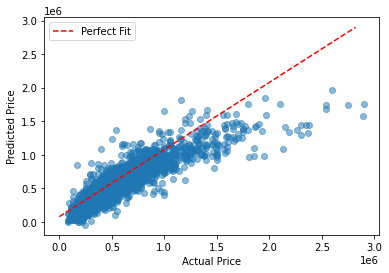

In [72]:
preds = significant_model.predict(X_test_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_cat_test.min(), y_cat_test.max())
ax.plot(perfect_line, linestyle="--", color="red", label="Perfect Fit")
ax.scatter(y_cat_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

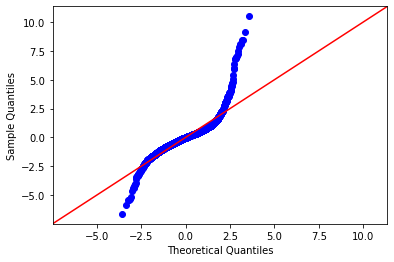

In [73]:
import scipy.stats as stats

residuals = (y_cat_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

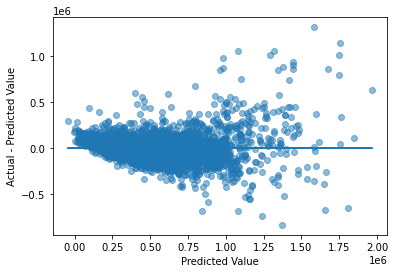

In [74]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test_final))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

No issues found looking for Homoscedasticity

# Normalizing Data

We are seeing data skewing away from our predictions in the later stages of predictions. This means we may have to 
normalize our data. Recall earlier we saw that price was pretty heavily skewed right.

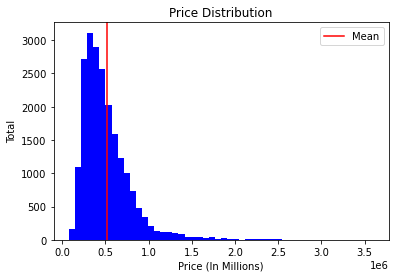

In [75]:
fig, ax = plt.subplots()

ax.hist(df['price'], color='blue', bins=50)
ax.set_xlabel('Price (In Millions)')
ax.set_ylabel('Total')
ax.set_title('Price Distribution')
plt.axvline(x=df['price'].mean(), color='red', label='Mean')
plt.legend(loc='upper right');

In [76]:
df_log_price = zc_df.copy()
df_log_price.columns = zc_df.columns.astype('str')
price_series = df_log_price['price']
df_log_price = df_log_price[sig_vars]

In [77]:
df_log_price['price'] = np.log(price_series)
df_log_price.rename(columns={'price': 'log_price'}, inplace=True)
df_log_price

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,zipcode,sqft_living15,house_age,reno,98004,98005,98006,98007,98008,98010,98011,98014,98019,98023,98024,98027,98028,98029,98033,98034,98038,98039,98040,98045,98052,98053,98055,98056,98058,98059,98065,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98199,log_price
0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,0,98178,1340,59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,12.309982
1,3,2.25,2570,7242,2.0,0.0,0.0,3,7,400,98125,1690,63,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,13.195614
2,2,1.00,770,10000,1.0,0.0,0.0,3,6,0,98028,2720,82,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.100712
3,4,3.00,1960,5000,1.0,0.0,0.0,5,7,910,98136,1360,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,13.311329
4,3,2.00,1680,8080,1.0,0.0,0.0,3,8,0,98074,1800,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13.142166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0.0,0.0,3,8,0,98103,1530,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.793859
21593,4,2.50,2310,5813,2.0,0.0,0.0,3,8,0,98146,1830,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,12.899220
21594,2,0.75,1020,1350,2.0,0.0,0.0,3,7,0,98144,1020,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,12.904459
21595,3,2.50,1600,2388,2.0,0.0,0.0,3,8,0,98027,1410,11,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.899220


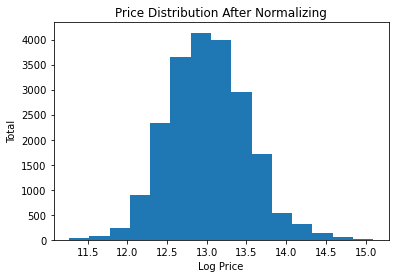

In [78]:
fig, ax = plt.subplots()

ax.hist(df_log_price['log_price'], bins=15)
ax.set_xlabel('Log Price')
ax.set_ylabel('Total')
ax.set_title('Price Distribution After Normalizing');

In [79]:
y_log = df_log_price['log_price']
X_log = df_log_price.drop('log_price', axis=1)

In [80]:
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, random_state=69)
X_log_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,zipcode,sqft_living15,house_age,reno,98004,98005,98006,98007,98008,98010,98011,98014,98019,98023,98024,98027,98028,98029,98033,98034,98038,98039,98040,98045,98052,98053,98055,98056,98058,98059,98065,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98199
4755,5,2.50,3180,13806,2.0,0.0,0.0,4,10,0,98033,3180,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5932,4,2.50,1850,9248,2.0,0.0,0.0,3,8,0,98028,2080,18,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14705,4,2.00,1440,9477,1.0,0.0,0.0,3,5,0,98056,1440,71,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8238,3,1.00,1000,6947,1.0,0.0,0.0,4,7,0,98125,1000,67,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5032,3,1.75,1730,7807,1.0,0.0,0.0,3,7,470,98034,1800,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4482,5,4.00,4580,4443,3.0,1.0,4.0,3,10,0,98075,2710,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12104,3,1.75,1890,93218,1.0,0.0,0.0,4,7,0,98092,1690,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15087,4,2.50,2370,10858,2.0,0.0,0.0,3,9,0,98004,2510,11,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10048,4,2.50,2010,9075,1.0,0.0,0.0,4,8,700,98006,1850,55,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
log_model = LinearRegression()

log_model_scores = cross_validate(
    estimator=log_model,
    X=X_log_train,
    y=y_log_train,
    return_train_score=True,
    cv=splitter
)

print("All Model")
print("Train score:     ", log_model_scores["train_score"].mean())
print("Validation score:", log_model_scores["test_score"].mean())

All Model
Train score:      0.8668463767480565
Validation score: 0.8600752954588673


In [82]:
sm.OLS(y_log_train, sm.add_constant(X_log_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1368.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:00:20   Log-Likelihood:                 4489.3
No. Observations:               15808   AIC:                            -8829.
Df Residuals:                   15733   BIC:                            -8254.
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -11.2991      7.177     -1.574      0.115     -25.366       2.768
bedrooms         -0.0020      0.002     -0.916      0.359      -0.006       0.002
bathrooms         0.0487      0.004     13.614      0.000       0.042       0.056
sqft_living       0.0002   4.29e-06     49.005      0.000       0.000       0.000
sqft_lot       9.506e-07   4.74e-08     20.054      0.000    8.58e-07    1.04e-06
floors           -0.0321      0.004     -7.591      0.000      -0.040      -0.024
waterfront        0.5027      0.022     22.915      0.000       0.460       0.546
view              0.0621      0.002     26.039      0.000       0.057       0.067
condition         0.0545      0.003     21.531      0.000       0.050       0.060
grade             0.0944      0.003     37.564      0.000       0.090       0.099
sqft_basement -7.791e-05   4.96e-06    -15.706      0.000   -8.76e-05   -6.82e-05
zipcode           0.0002   7.32e-05      3.112      0.002    8.43e-05       0.000
sqft_living15  8.308e-05   4.01e-06     20.738      0.000    7.52e-05    9.09e-05
house_age         0.0006   8.53e-05      7.531      0.000       0.000       0.001
reno              0.0703      0.008      8.287      0.000       0.054       0.087
98004             1.0549      0.013     78.700      0.000       1.029       1.081
98005             0.6847      0.018     39.047      0.000       0.650       0.719
98006             0.5932      0.012     51.343      0.000       0.571       0.616
98007             0.6068      0.018     32.809      0.000       0.571       0.643
98008             0.6023      0.014     44.615      0.000       0.576       0.629
98010             0.2055      0.022      9.408      0.000       0.163       0.248
98011             0.4199      0.017     25.289      0.000       0.387       0.452
98014             0.2738      0.021     13.128      0.000       0.233       0.315
98019             0.2845      0.015     18.438      0.000       0.254       0.315
98023            -0.0689      0.011     -6.519      0.000      -0.090      -0.048
98024             0.3589      0.024     14.695      0.000       0.311       0.407
98027             0.4560      0.012     39.357      0.000       0.433       0.479
98028             0.3824      0.013     28.387      0.000       0.356       0.409
98029             0.5549      0.013     42.694      0.000       0.529       0.580
98033             0.7253      0.011     63.403      0.000       0.703       0.748
98034             0.4955      0.010     49.739      0.000       0.476       0.515
98038             0.1339      0.010     13.726      0.000       0.115       0.153
98039             1.2232      0.037     33.027      0.000       1.151       1.296
98040             0.8030      0.014     56.364      0.000       0.775       0.831
98045             0.2802      0.015     18.666   

In [83]:
# Bedrooms variable has a p_score above .05, so we will remove it and rerun

X_log_train.drop('bedrooms', axis=1, inplace=True)

/Users/georgeferre/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [84]:
log_model = LinearRegression()

log_model_scores = cross_validate(
    estimator=log_model,
    X=X_log_train,
    y=y_log_train,
    return_train_score=True,
    cv=splitter
)

print("All Model")
print("Train score:     ", log_model_scores["train_score"].mean())
print("Validation score:", log_model_scores["test_score"].mean())

All Model
Train score:      0.8668390742006661
Validation score: 0.860073824974774


In [85]:
sm.OLS(y_log_train, sm.add_constant(X_log_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1387.
Date:                Fri, 04 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:00:21   Log-Likelihood:                 4488.9
No. Observations:               15808   AIC:                            -8830.
Df Residuals:                   15734   BIC:                            -8262.
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -11.3722      7.176     -1.585      0.113     -25.438       2.694
bathrooms         0.0480      0.004     13.703      0.000       0.041       0.055
sqft_living       0.0002   4.04e-06     51.707      0.000       0.000       0.000
sqft_lot       9.537e-07   4.73e-08     20.174      0.000    8.61e-07    1.05e-06
floors           -0.0320      0.004     -7.586      0.000      -0.040      -0.024
waterfront        0.5035      0.022     22.973      0.000       0.461       0.546
view              0.0623      0.002     26.159      0.000       0.058       0.067
condition         0.0545      0.003     21.521      0.000       0.050       0.059
grade             0.0947      0.003     37.857      0.000       0.090       0.100
sqft_basement -7.794e-05   4.96e-06    -15.713      0.000   -8.77e-05   -6.82e-05
zipcode           0.0002   7.32e-05      3.121      0.002     8.5e-05       0.000
sqft_living15  8.323e-05      4e-06     20.795      0.000    7.54e-05    9.11e-05
house_age         0.0006   8.49e-05      7.478      0.000       0.000       0.001
reno              0.0705      0.008      8.327      0.000       0.054       0.087
98004             1.0549      0.013     78.704      0.000       1.029       1.081
98005             0.6846      0.018     39.043      0.000       0.650       0.719
98006             0.5932      0.012     51.343      0.000       0.571       0.616
98007             0.6061      0.018     32.798      0.000       0.570       0.642
98008             0.6020      0.013     44.609      0.000       0.576       0.628
98010             0.2058      0.022      9.421      0.000       0.163       0.249
98011             0.4199      0.017     25.287      0.000       0.387       0.452
98014             0.2742      0.021     13.154      0.000       0.233       0.315
98019             0.2847      0.015     18.456      0.000       0.254       0.315
98023            -0.0689      0.011     -6.526      0.000      -0.090      -0.048
98024             0.3594      0.024     14.716      0.000       0.312       0.407
98027             0.4563      0.012     39.392      0.000       0.434       0.479
98028             0.3826      0.013     28.397      0.000       0.356       0.409
98029             0.5552      0.013     42.726      0.000       0.530       0.581
98033             0.7254      0.011     63.417      0.000       0.703       0.748
98034             0.4954      0.010     49.732      0.000       0.476       0.515
98038             0.1341      0.010     13.741      0.000       0.115       0.153
98039             1.2239      0.037     33.053      0.000       1.151       1.296
98040             0.8029      0.014     56.358      0.000       0.775       0.831
98045             0.2804      0.015     18.679      0.000       0.251       0.310
98052             0.5880      0.010     57.934   

The model is looking good! Now we just need to check if our issues with our QQ Plot have been solved

In [86]:
X_log_test_final = X_log_test.drop('bedrooms', axis=1)

final_log_model = LinearRegression()
final_log_model.fit(X_log_train, y_log_train)

LinearRegression()

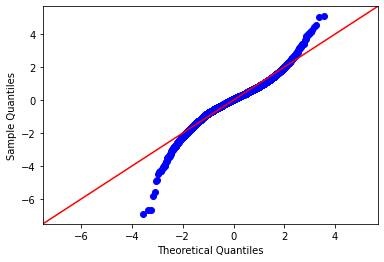

In [87]:
log_preds = final_log_model.predict(X_log_test_final)
residuals = (y_log_test - log_preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

We can see that although there is some trailing off, our QQ plot has corrected by quite a bit. We feel safe to use this model in our presentation.